# Predict fuel efficient

In [121]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.9.1


In [122]:
df = pd.read_csv('dataImages.csv', sep=',')


In [123]:
dataset = df.copy()
dataset.tail()


,Unnamed: 0,NameImage,label,bbox-0,bbox-1,bbox-2,bbox-3,AOL,POL,COL,...,PESOABATE,RC,FAMACHA,CC,AG,AC,AP,CT,CP,Profund
41,41,028.png,255,254,562,613,1038,"10,07","2,42","5,18",...,NaN,NaN,2,64,63,63,32,81,40,31
42,42,027.png,255,343,890,797,1422,9,"2,19","4,06",...,NaN,NaN,3,66,66,63,39,81,35,24
43,43,017.png,255,265,447,645,858,"7,74","2,11","4,75",...,NaN,NaN,3,62,67,62,35,83,31,27
44,44,031.png,255,444,1100,1021,1712,"6,81","2,05","3,93",...,NaN,NaN,3,60,66,66,37,82,37,29
45,45,026.png,255,275,646,674,1084,"10,37","2,62","4,05",...,NaN,NaN,2,62,64,58,30,86,42,28


In [124]:
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset = dataset.drop('NameImage', axis=1)
dataset = dataset.drop('PESOABATE', axis=1)
dataset = dataset.drop('RC', axis=1)
dataset = dataset.drop('AOL', axis=1)
dataset = dataset.drop('POL', axis=1)
dataset = dataset.drop('COL', axis=1)
dataset = dataset.drop('EGS', axis=1)
dataset = dataset.drop('ECC', axis=1)
dataset = dataset.drop('FAMACHA', axis=1)
dataset = dataset.drop('CC', axis=1)
dataset = dataset.drop('AG', axis=1)
dataset = dataset.drop('AC', axis=1)
dataset = dataset.drop('AP', axis=1)
dataset = dataset.drop('CT', axis=1)
dataset = dataset.drop('CP', axis=1)
dataset = dataset.drop('Profund', axis=1)
dataset = dataset.drop('label', axis=1)

dataset


,bbox-0,bbox-1,bbox-2,bbox-3,PESOVIVO
0,490,950,904,1563,"30,35"
1,485,736,866,1312,"28,7"
2,513,577,1063,1318,"42,7"
3,387,643,812,1137,"34,8"
4,425,572,907,1183,"38,1"
5,438,1052,1043,1745,"42,8"
6,447,261,826,850,"33,4"
7,433,784,948,1412,"43,2"
8,500,539,927,1168,"50,2"
9,501,1017,936,1654,"30,5"


In [125]:
dataset.isna().sum()

bbox-0      0
bbox-1      0
bbox-2      0
bbox-3      0
PESOVIVO    0
dtype: int64

In [126]:
# Tratar os floats que foram inseridos com virgula ao inves de ponto.

def replaceFloat(nameColumns):
    aux = [float(str(x).replace(',', '.')) for x in dataset[nameColumns]]
    return aux


for x in dataset:
    dataset[x] = replaceFloat(x)

dataset


,bbox-0,bbox-1,bbox-2,bbox-3,PESOVIVO
0,490.0,950.0,904.0,1563.0,30.35
1,485.0,736.0,866.0,1312.0,28.70
2,513.0,577.0,1063.0,1318.0,42.70
3,387.0,643.0,812.0,1137.0,34.80
4,425.0,572.0,907.0,1183.0,38.10
5,438.0,1052.0,1043.0,1745.0,42.80
6,447.0,261.0,826.0,850.0,33.40
7,433.0,784.0,948.0,1412.0,43.20
8,500.0,539.0,927.0,1168.0,50.20
9,501.0,1017.0,936.0,1654.0,30.50


In [127]:
dataset = dataset.dropna()


In [128]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)


In [129]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats


,count,mean,std,min,25%,50%,75%,max
bbox-0,37.0,382.000000,118.026833,156.0,312.0,404.0,463.0,646.0
bbox-1,37.0,696.270270,303.860773,30.0,469.0,732.0,890.0,1221.0
bbox-2,37.0,806.135135,212.063036,379.0,674.0,866.0,948.0,1063.0
bbox-3,37.0,1284.972973,364.488568,542.0,1038.0,1318.0,1650.0,1886.0
PESOVIVO,37.0,38.598649,4.979060,28.7,36.0,39.1,42.3,50.2


In [130]:
train_labels = train_dataset.pop('PESOVIVO')
test_labels = test_dataset.pop('PESOVIVO')

In [131]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']


normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data = normed_train_data.drop('PESOVIVO', axis=1)
normed_test_data = normed_test_data.drop('PESOVIVO', axis=1)


In [132]:
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation='relu', input_shape=[
                   len(train_dataset.keys())]),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model


In [133]:
model = build_model()


In [134]:
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                320       
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


In [135]:
example_batch = normed_train_data[:10]
print(example_batch)
example_result = model.predict(example_batch)
example_result


      bbox-0    bbox-1    bbox-2    bbox-3
25 -1.465768 -1.389683 -1.665237 -1.434813
22  0.186398  0.117586 -0.590085  0.203098
28  0.449050  1.315503  0.593526  1.089272
4   0.364324 -0.408971  0.475636 -0.279770
10  2.236779  0.624397  1.211267  1.001477
31  1.084499  0.782364  1.149964  1.070067
29  0.262652  0.436811  0.159692  0.381430
11  1.923291 -0.794016  1.145248 -0.019131
20 -0.601558 -2.192683 -0.472195 -2.038399
32 -0.169453  0.505922  0.291729  0.230534
1/1 [==============================] - 0s 45ms/step


array([[-0.3654497 ],
       [ 0.00112348],
       [ 0.20034619],
       [-0.17673352],
       [ 0.07375896],
       [ 0.07551059],
       [ 0.07951093],
       [-0.34592208],
       [-0.5173596 ],
       [ 0.04882784]], dtype=float32)

In [136]:
# Mostra o progresso do treinamento imprimindo um único ponto para cada epoch completada
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0:
      print('')
    print('.', end='')


EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[PrintDot()])



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [137]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()


,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,5.631739,1.611489,5.631739,23.016029,3.602472,23.016029,995
996,5.618266,1.685318,5.618266,19.881468,3.134059,19.881468,996
997,5.615967,1.607274,5.615967,22.398170,3.554190,22.398170,997
998,5.607419,1.700883,5.607419,20.900824,3.226607,20.900824,998
999,5.621938,1.631946,5.621938,21.177719,3.432932,21.177719,999


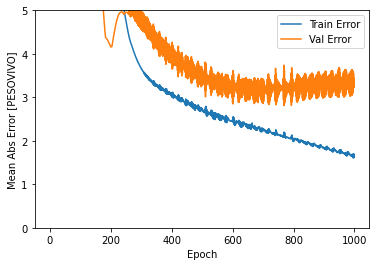

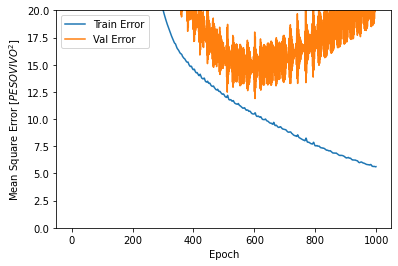

In [138]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [PESOVIVO]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label='Val Error')
  plt.ylim([0, 5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$PESOVIVO^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label='Val Error')
  plt.ylim([0, 20])
  plt.legend()
  plt.show()


plot_history(history)



....................................................................................................
....................................................................................................

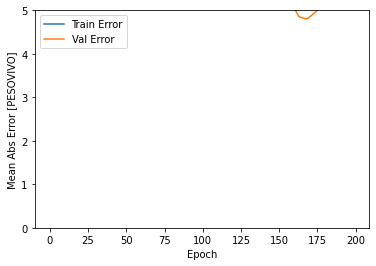

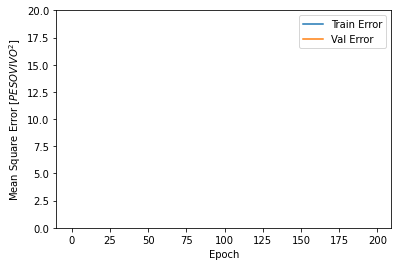

In [139]:
model = build_model()

# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)


In [140]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} PESOVIVO".format(mae))


1/1 - 0s - loss: 60.1285 - mae: 6.5242 - mse: 60.1285 - 18ms/epoch - 18ms/step
Testing set Mean Abs Error:  6.52 PESOVIVO


1/1 [==============================] - 0s 49ms/step


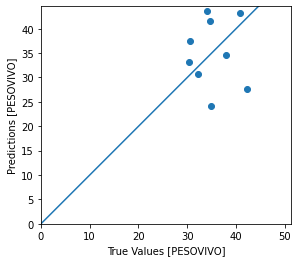

In [141]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [PESOVIVO]')
plt.ylabel('Predictions [PESOVIVO]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])


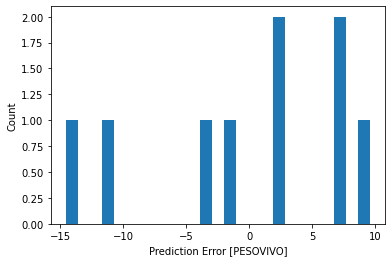

In [142]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel("Prediction Error [PESOVIVO]")
_ = plt.ylabel("Count")


In [143]:
df_aux = pd.DataFrame({'Actual': test_labels, 'Predicted': test_predictions})
df_aux


,Actual,Predicted
0,30.35,33.180664
3,34.80,24.079145
9,30.50,37.407589
19,34.60,41.535648
21,40.75,43.158073
36,32.20,30.667299
39,42.20,27.655815
43,37.90,34.666721
44,34.00,43.604870
